# Homework 7

# Task 1 (No coding)

# Task 2 (Coding) 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp
from sympy import Symbol, Point2D, Point3D, Derivative, Function, Eq,cos,sin
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches
from IPython.display import HTML, display

In [6]:
from sympy.physics.mechanics import init_vprinting
init_vprinting()

In [7]:
g = Symbol('g')
m1,m2 = Symbol('m1'),Symbol('m2')
t = Symbol('t')
x = Function('x')(t)
T = Symbol('T')
phi = Function('phi')(t)
l = Symbol('l')
J = m2*l**2

In [8]:
Eqnarray_full = [
    Eq(m1*sp.diff(x,t,2), T*sin(phi)),
    # We do not need Y-coordinate since the cart does not move along Y-axis.
    # Eq(N1, T*cos(phi)+g*m1),
    Eq(m2*(-l*sin(phi)*sp.diff(phi,t,1)**2+l*cos(phi)*sp.diff(phi,t,2)+sp.diff(x,t,2)), -T*sin(phi)),
    Eq(-m2*l*(sin(phi)*sp.diff(phi,t,2) + cos(phi)*sp.diff(phi,t,1)**2), -T*cos(phi)+g*m2)
]

for i in range(len(Eqnarray_full)):
  display(Eqnarray_full[i])

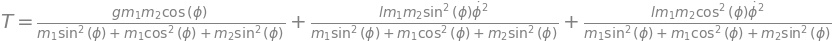

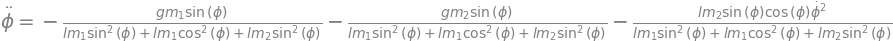

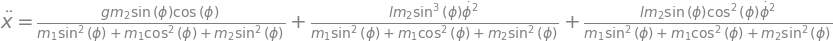

g*m1*m2*cos(phi(t))/(m1*sin(phi(t))**2 + m1*cos(phi(t))**2 + m2*sin(phi(t))**2) + l*m1*m2*sin(phi(t))**2*Derivative(phi(t), t)**2/(m1*sin(phi(t))**2 + m1*cos(phi(t))**2 + m2*sin(phi(t))**2) + l*m1*m2*cos(phi(t))**2*Derivative(phi(t), t)**2/(m1*sin(phi(t))**2 + m1*cos(phi(t))**2 + m2*sin(phi(t))**2) 

-g*m1*sin(phi(t))/(l*m1*sin(phi(t))**2 + l*m1*cos(phi(t))**2 + l*m2*sin(phi(t))**2) - g*m2*sin(phi(t))/(l*m1*sin(phi(t))**2 + l*m1*cos(phi(t))**2 + l*m2*sin(phi(t))**2) - l*m2*sin(phi(t))*cos(phi(t))*Derivative(phi(t), t)**2/(l*m1*sin(phi(t))**2 + l*m1*cos(phi(t))**2 + l*m2*sin(phi(t))**2) 

g*m2*sin(phi(t))*cos(phi(t))/(m1*sin(phi(t))**2 + m1*cos(phi(t))**2 + m2*sin(phi(t))**2) + l*m2*sin(phi(t))**3*Derivative(phi(t), t)**2/(m1*sin(phi(t))**2 + m1*cos(phi(t))**2 + m2*sin(phi(t))**2) + l*m2*sin(phi(t))*cos(phi(t))**2*Derivative(phi(t), t)**2/(m1*sin(phi(t))**2 + m1*cos(phi(t))**2 + m2*sin(phi(t))**2) 


In [9]:
xxx = sp.solve(Eqnarray_full,[sp.diff(x,t,2),T,sp.diff(phi,t,2)])

for i in xxx.keys():
    display(Eq(i,xxx[i]))


print(xxx[T], "\n")
print(xxx[sp.diff(phi,t,2)], "\n")
print(xxx[sp.diff(x,t,2)], "\n")
  

In [85]:
sp.classify_ode(Eq(sp.diff(x,t,2),xxx[sp.diff(x,t,2)]), x)

('nth_algebraic',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters',
 'nth_algebraic_Integral',
 'nth_linear_constant_coeff_variation_of_parameters_Integral',
 'nth_linear_euler_eq_nonhomogeneous_variation_of_parameters_Integral')

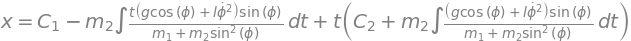

In [41]:
res = sp.dsolve(Eq(sp.diff(x,t,2),xxx[sp.diff(x,t,2)]), x, hint="nth_linear_constant_coeff_variation_of_parameters")
display(res)

Since the equation cannot be solved analytically, so we need to solve it numerically

# Simulation

In [18]:
# Get the exact value for g
from scipy.constants import g

# Parameters
m1 = 5  # kg
m2 = 1  # kg
l = 1   # m

# Function defining the equations of motion
def equations(t, y):
    phi, phi_dot, x, x_dot = y
    phi_double_dot = (
        -g * m1 * np.sin(phi) - g * m2 * np.sin(phi) -
        l * m2 * np.sin(phi) * np.cos(phi) * phi_dot**2
    ) / (
        l * (m1 + m2 * (np.sin(phi)**2))
    )
    x_double_dot = (
        g * m2 * np.sin(phi) * np.cos(phi) +
        l * m2 * np.sin(phi)**3 * phi_dot**2 +
        l * m2 * np.sin(phi) * np.cos(phi)**2 * phi_dot**2
    ) / (
        m1 * np.sin(phi)**2 + m1 * np.cos(phi)**2 + m2 * np.sin(phi)**2
    )
    return [phi_dot, phi_double_dot, x_dot, x_double_dot]

# Initial conditions from the slide. You may play with the values to see something interesting.
phi0 = np.radians(-135)  # Initial angle in radians
phi_dot0 = 0      # Initial angular velocity
x0 = 0            # Initial position
x_dot0 = 0        # Initial velocity

initial_conditions = [phi0, phi_dot0, x0, x_dot0]

# Time span
t_span = np.linspace(0, 10, 100)

# Solve the differential equations
sol = solve_ivp(equations, [t_span[0], t_span[-1]], initial_conditions, t_eval=t_span)

# Extracting solutions
phi_sol = sol.y[0]
phi_dot_sol = sol.y[1]
x_sol = sol.y[2]
x_dot_sol = sol.y[3]

# Convert angle from radians to degrees for the plot
phi_deg = np.degrees(phi_sol)
phi_dot_deg = np.degrees(phi_dot_sol)

# Calculate velocities and accelerations
# x_acc_sol = np.gradient(x_dot_sol, t_span, edge_order=2)
# phi_acc_sol = np.gradient(phi_dot_sol, t_span, edge_order=2)

# Calculate the velocity and acceleration vectors for the ball perpendicular to its trajectory
# ball_vel_perpendicular = np.vstack([-np.cos(phi_sol) * phi_dot_sol, np.sin(phi_sol) * phi_dot_sol])
# ball_acc_perpendicular = np.vstack([-np.cos(phi_sol) * phi_acc_sol, np.sin(phi_sol) * phi_acc_sol])


# Function to update the animation
def update(i):
    cart.set_xy([x_sol[i] - 0.5, -0.05])
    rod.set_data([x_sol[i], x_sol[i] + np.sin(phi_sol[i]) * l], [0, -np.cos(phi_sol[i]) * l])
    ball.set_center([x_sol[i] + np.sin(phi_sol[i]) * l, -np.cos(phi_sol[i]) * l])
    
    # Uncomment this to see the vectors for velocity and acceleration (might be not correct)
    
    # cart_vel_vec.set_data([x_sol[i], x_sol[i] + x_dot_sol[i]], [0, 0])
    # cart_acc_vec.set_data([x_sol[i], x_sol[i] + x_acc_sol[i]], [0, 0])
    # ball_vel_vec_perpendicular.set_data([x_sol[i] + np.sin(phi_sol[i]) * l, -(x_sol[i] + np.sin(phi_sol[i]) * l + ball_vel_perpendicular[0, i])],
    #                                     [-np.cos(phi_sol[i]) * l, -np.cos(phi_sol[i]) * l + ball_vel_perpendicular[1, i]])
    # ball_acc_vec_perpendicular.set_data([x_sol[i] + np.sin(phi_sol[i]) * l, -(x_sol[i] + np.sin(phi_sol[i]) * l + ball_acc_perpendicular[0, i])],
    #                                     [-np.cos(phi_sol[i]) * l, -np.cos(phi_sol[i]) * l + ball_acc_perpendicular[1, i]])

# Create the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-1.5, 1.5)

# Create velocity and acceleration vectors for the cart
cart_vel_vec, = ax.plot([], [], 'b', lw=2, label='Cart Velocity')
cart_acc_vec, = ax.plot([], [], 'g', lw=2, label='Cart Acceleration')

# Create velocity and acceleration vectors for the ball perpendicular to its trajectory
# ball_vel_vec_perpendicular, = ax.plot([], [], 'b--', lw=2, label='Ball Velocity (Perpendicular)')
# ball_acc_vec_perpendicular, = ax.plot([], [], 'g--', lw=2, label='Ball Acceleration (Perpendicular)')

# Create the cart and pole objects
cart = patches.Rectangle((0, 0), 1, 0.1, color='dodgerblue')
ball = patches.Circle((0, 0), 0.1, color='green')
rod, = ax.plot([], [], 'r', lw=2)

# Add cart to the axes
ax.add_patch(cart)
ax.add_patch(ball)

# Show the animation
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Position (m)')
plt.ylabel('Height (m)')
plt.title('Cart-Pole System Animation')
plt.grid()
# plt.legend()

# Set up the animation
ani = FuncAnimation(fig, update, frames=len(t_span), interval=50)

# plt.show()

display(HTML(ani.to_jshtml()))

ani.save("-135_sim.gif", fps=100)

plt.close(fig)

MovieWriter ffmpeg unavailable; using Pillow instead.


# Plots

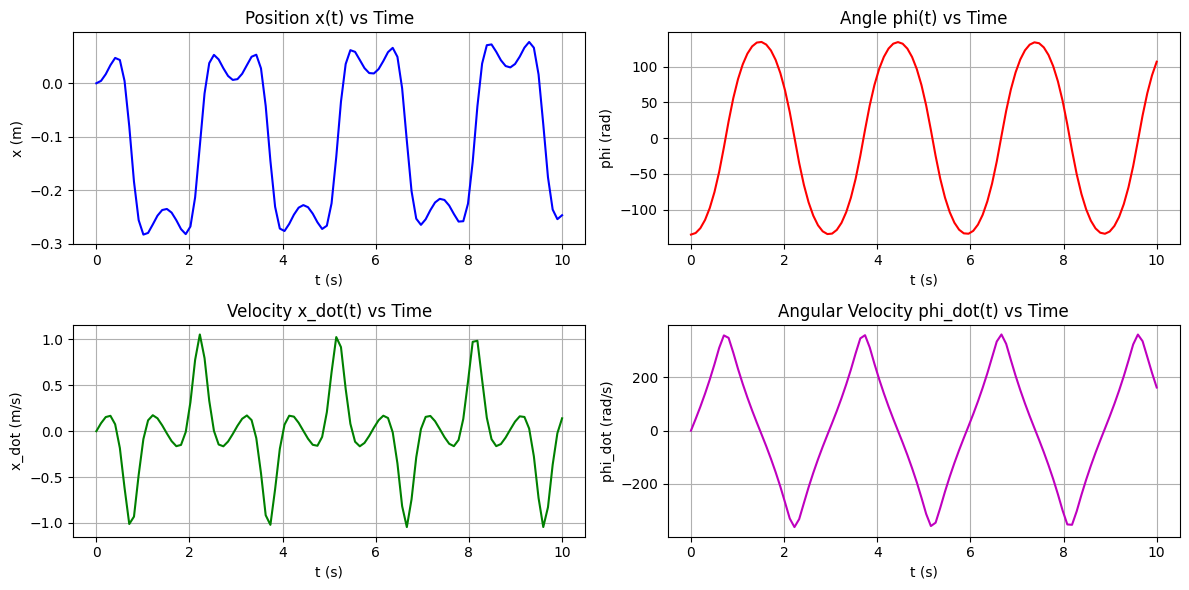

In [19]:
# Plotting subplots
plt.figure(figsize=(12, 6))

# Plotting x(t)
plt.subplot(221)
plt.plot(t_span, x_sol, 'b')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.title('Position x(t) vs Time')
plt.grid(True)

# Plotting phi(t)
plt.subplot(222)
plt.plot(t_span, phi_deg, 'r')
plt.xlabel('t (s)')
plt.ylabel('phi (rad)')
plt.title('Angle phi(t) vs Time')
plt.grid(True)

# Plotting x_dot(t)
plt.subplot(223)
plt.plot(t_span, x_dot_sol, 'g')
plt.xlabel('t (s)')
plt.ylabel('x_dot (m/s)')
plt.title('Velocity x_dot(t) vs Time')
plt.grid(True)

# Plotting phi_dot(t)
plt.subplot(224)
plt.plot(t_span, phi_dot_deg, 'm')
plt.xlabel('t (s)')
plt.ylabel('phi_dot (rad/s)')
plt.title('Angular Velocity phi_dot(t) vs Time')
plt.grid(True)

plt.tight_layout()
plt.savefig("-135_plot.jpg")
plt.show()